jak licymy sobie loss to jak dorzyc regularyzacje to ona powoduje że ten błąd ma dodatkowy współczynnik. Wspołczynnik ktory karze siec za to żema duże wartości wagi.
Służy więc do tego żeby naszą szaloną sieć uspokoić

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 20

#wczytanie danych 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Wczytaj zbiór MNIST i znormalizuj dane (jak na poprzednich zajęciach)
# Stwórz dwa modele. Każdy z nich powinien mieć dwie warstwy ukryte o 64 neuronach. 
# Różnica polega na dodaniu w jednym z modeli argumentu do każdej warstwy ukrytej (Dense) -
# kernel_regularizer=l2(0.001).
# Wytrenuj oba modele
# Stórz wykresy porównujące val_acc i acc obu modeli

In [ ]:
# normalizacja danych
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# no kernel regularizer
noreg = Sequential()
noreg.add(Flatten(input_shape=(28,28)))
noreg.add(Dense(256, activation = 'relu'))
noreg.add(Dense(10, activation = 'softmax'))

noreg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

noreg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history_noreg = noreg.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist_noreg = pd.DataFrame(history_noreg.history)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7128 - accuracy: 0.8868 - val_loss: 0.4319 - val_accuracy: 0.9169
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3286 - accuracy: 0.9294 - val_loss: 0.3003 - val_accuracy: 0.9384
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9410 - val_loss: 0.3925 - val_accuracy: 0.9270
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2448 - accuracy: 0.9428 - val_loss: 0.3452 - val_accuracy: 0.9375
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2270 - accuracy: 0.9479 - val_loss: 0.2546 - val_accuracy: 0.9481
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2115 - accuracy: 0.9517 - val_loss: 0.2781 - val_accuracy: 0.9438
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1975 - accuracy: 0.9532 - val_loss: 0.2782 - val_accuracy:

In [8]:
# kernel regularization
reg = Sequential()
reg.add(Flatten(input_shape=(28,28)))
reg.add(Dense(256, activation = 'relu', kernel_regularizer=l2(0.001)))
reg.add(Dense(10, activation = 'softmax'))

reg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history_reg = noreg.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist_reg = pd.DataFrame(history_reg.history)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1767 - accuracy: 0.9612 - val_loss: 0.3097 - val_accuracy: 0.9538
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1702 - accuracy: 0.9627 - val_loss: 0.3191 - val_accuracy: 0.9526
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1654 - accuracy: 0.9638 - val_loss: 0.3530 - val_accuracy: 0.9532
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1586 - accuracy: 0.9652 - val_loss: 0.3509 - val_accuracy: 0.9531
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1649 - accuracy: 0.9650 - val_loss: 0.3449 - val_accuracy: 0.9569
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1577 - accuracy: 0.9659 - val_loss: 0.4252 - val_accuracy: 0.9498


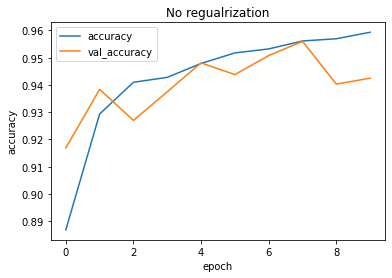

In [11]:
plt.plot()
plt.plot(hist_noreg.accuracy, label = "accuracy")
plt.plot(hist_noreg.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("No regualrization")


plt.legend()

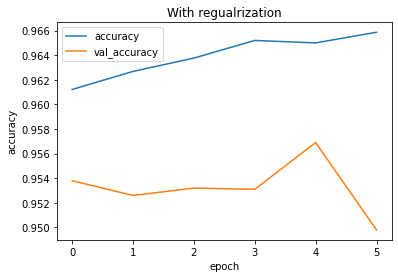

In [12]:
plt.plot()
plt.plot(hist_reg.accuracy, label = "accuracy")
plt.plot(hist_reg.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("With regualrization")


plt.legend()